In [452]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [453]:
youth_mortality_rate = pd.read_csv("data/1. youth-mortality-rate.csv")
youth_mortality_rate

,Entity,Code,Year,Under-fifteen mortality rate
0,Afghanistan,AFG,1977,30.110573
1,Afghanistan,AFG,1978,29.290777
2,Afghanistan,AFG,1979,28.479010
3,Afghanistan,AFG,1980,27.649078
4,Afghanistan,AFG,1981,26.834482
...,...,...,...,...
10510,Zimbabwe,ZWE,2018,6.515447
10511,Zimbabwe,ZWE,2019,6.387253
10512,Zimbabwe,ZWE,2020,6.259883
10513,Zimbabwe,ZWE,2021,5.999933


In [454]:
number_infant_death = pd.read_csv("data/2. number-of-infant-deaths-unwpp.csv")
number_infant_death

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0
...,...,...,...,...
18939,Zimbabwe,ZWE,2019,17470.0
18940,Zimbabwe,ZWE,2020,17143.0
18941,Zimbabwe,ZWE,2021,16971.0
18942,Zimbabwe,ZWE,2022,16890.0


In [455]:
child_mort_income = pd.read_csv("data/3. child-mortality-by-income-level-of-country.csv")
child_mort_income

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880
...,...,...,...,...
14195,Zimbabwe,ZWE,2018,5.337321
14196,Zimbabwe,ZWE,2019,5.237655
14197,Zimbabwe,ZWE,2020,5.143166
14198,Zimbabwe,ZWE,2021,4.908745


In [456]:
distr_causes_death = pd.read_csv("data/4. Distribution of Causes of Death among Children Aged less than 5 years.csv")
distr_causes_death

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146659,MORT_300,Distribution of causes of death among children...,numeric,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2000,...,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,EN,2018-11-26T23:00:00.000Z
146660,MORT_300,Distribution of causes of death among children...,numeric,EUR,Europe,Country,AND,Andorra,Year,2000,...,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,EN,2018-11-26T23:00:00.000Z
146661,MORT_300,Distribution of causes of death among children...,numeric,EUR,Europe,Country,AND,Andorra,Year,2000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
146662,MORT_300,Distribution of causes of death among children...,numeric,EUR,Europe,Country,SMR,San Marino,Year,2000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [457]:
number_maternal_death_by_region = pd.read_csv("data/5. number-of-maternal-deaths-by-region.csv")
number_maternal_death_by_region

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.5340,NaN
1,Afghanistan,AFG,1986,8671.9210,NaN
2,Afghanistan,AFG,1987,8488.9600,NaN
3,Afghanistan,AFG,1988,7522.1216,NaN
4,Afghanistan,AFG,1989,7549.7050,NaN
...,...,...,...,...,...
7051,Zimbabwe,ZWE,2016,1918.8360,NaN
7052,Zimbabwe,ZWE,2017,1762.2927,NaN
7053,Zimbabwe,ZWE,2018,1735.1570,NaN
7054,Zimbabwe,ZWE,2019,1906.9050,NaN


In [458]:
birth_attended_health_staff = pd.read_csv("data/6. births-attended-by-health-staff-sdgs.csv")
birth_attended_health_staff

,Entity,Code,Year,Births attended by skilled health staff (% of total)
0,Afghanistan,AFG,2000,12.4
1,Afghanistan,AFG,2003,14.3
2,Afghanistan,AFG,2006,18.9
3,Afghanistan,AFG,2008,24.0
4,Afghanistan,AFG,2010,34.3
...,...,...,...,...
2980,Zimbabwe,ZWE,2009,60.2
2981,Zimbabwe,ZWE,2011,66.2
2982,Zimbabwe,ZWE,2014,80.0
2983,Zimbabwe,ZWE,2015,78.1


In [459]:
global_vaccin_covrg = pd.read_csv("data/7. global-vaccination-coverage.csv")
global_vaccin_covrg

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,Zimbabwe,ZWE,2017,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0
7893,Zimbabwe,ZWE,2018,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0
7894,Zimbabwe,ZWE,2019,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0
7895,Zimbabwe,ZWE,2020,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0


In [460]:
health_protect_covg = pd.read_csv("data/8. health-protection-coverage.csv")
health_protect_covg

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1
...,...,...,...,...
157,Venezuela,VEN,2010,100.0
158,Vietnam,VNM,2010,61.0
159,Yemen,YEM,2003,42.0
160,Zambia,ZMB,2008,8.4


In [461]:
# Group by 'Year' and calculate the total number of deaths
total_deaths_per_year = number_infant_death.groupby('Year')['Deaths - Sex: all - Age: 0 - Variant: estimates'].sum().reset_index()


# Rename columns for clarity
total_deaths_per_year.columns = ['Year', 'Total Infant Deaths']

# Display the result
print(total_deaths_per_year)


    Year  Total Infant Deaths
0   1950         8.463499e+07
1   1951         8.481936e+07
2   1952         8.596467e+07
3   1953         8.576861e+07
4   1954         8.598583e+07
..   ...                  ...
69  2019         2.902890e+07
70  2020         2.787788e+07
71  2021         2.722235e+07
72  2022         2.687132e+07
73  2023         2.591572e+07

[74 rows x 2 columns]


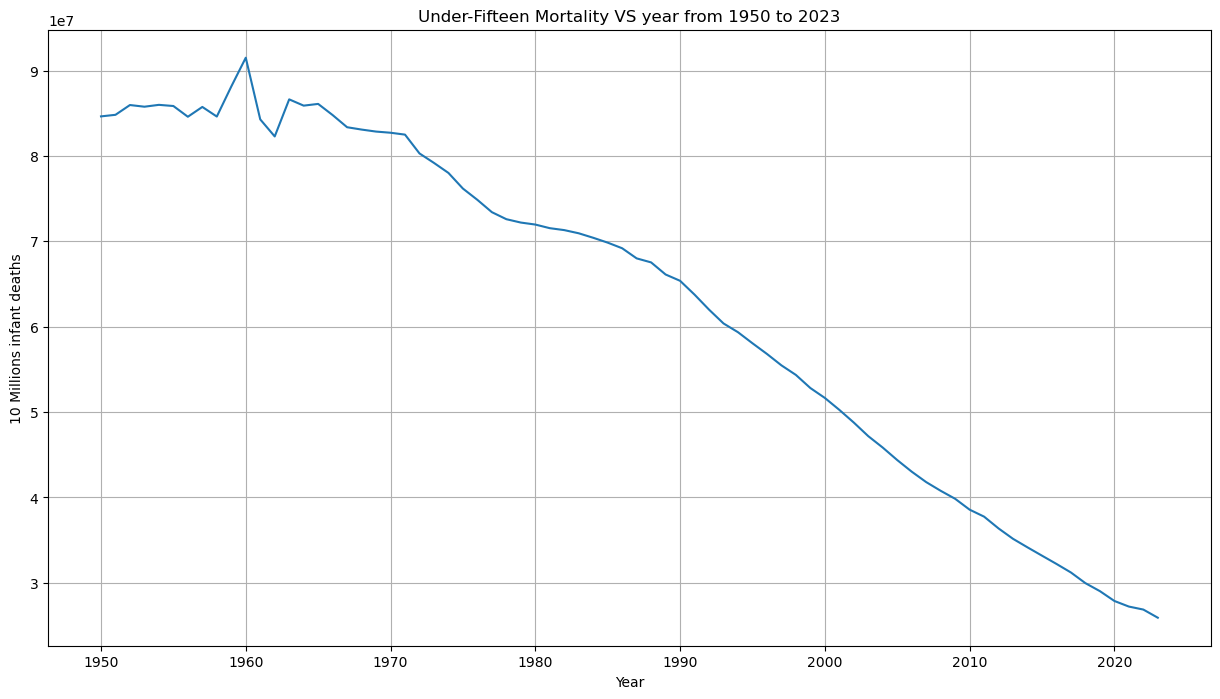

In [462]:
plt.figure(figsize=(15,8))
plt.plot(total_deaths_per_year['Year'], total_deaths_per_year['Total Infant Deaths'])
plt.xlabel("Year")
plt.ylabel("10 Millions infant deaths")
plt.title("Under-Fifteen Mortality VS year from 1950 to 2023")
plt.grid()
plt.show()

### evolution of medecine -> reduction but still around 25Millions in 2023 and aroud 27M in 2020


In [463]:
metadata = pd.read_csv("data/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3401556.csv")
metadata = metadata[["Country Code", "IncomeGroup", "Region"]]
metadata = metadata.rename(columns={"Country Code":"Code"})
metadata

,Code,IncomeGroup,Region
0,ABW,High income,Latin America & Caribbean
1,AFE,NaN,NaN
2,AFG,Low income,South Asia
3,AFW,NaN,NaN
4,AGO,Lower middle income,Sub-Saharan Africa
...,...,...,...
260,XKX,Upper middle income,Europe & Central Asia
261,YEM,Low income,Middle East & North Africa
262,ZAF,Upper middle income,Sub-Saharan Africa
263,ZMB,Lower middle income,Sub-Saharan Africa


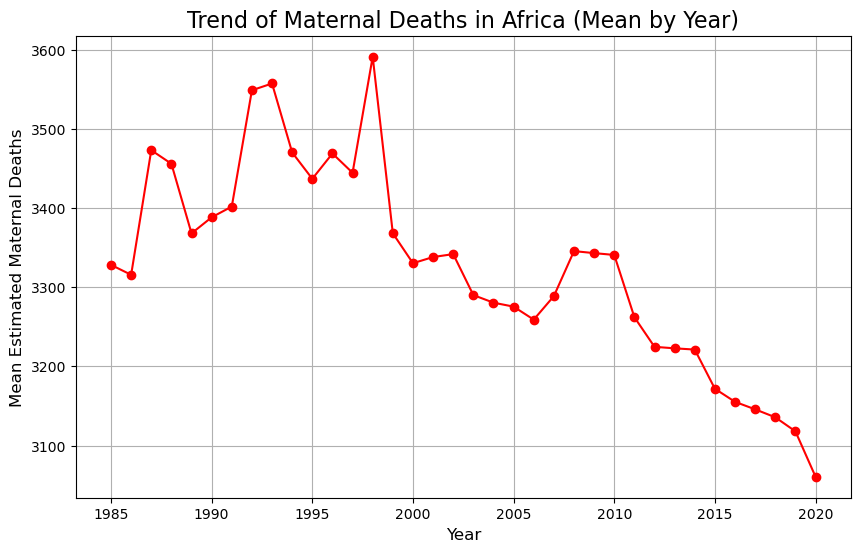

In [464]:
africa_data = pd.merge(number_maternal_death_by_region, metadata, on="Code")

africa_data = africa_data[africa_data["Region"].isin(["Sub-Saharan Africa", "Middle East & North Africa"])]

# Group by year and calculate the mean of maternal deaths
africa_maternal_deaths = africa_data.groupby("Year")["Estimated maternal deaths"].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(africa_maternal_deaths.index, africa_maternal_deaths.values, marker='o', color='red')

# Add titles and labels
plt.title("Trend of Maternal Deaths in Africa (Mean by Year)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Estimated Maternal Deaths", fontsize=12)
plt.grid(True)

In [465]:
death_rate_income = pd.merge(left=youth_mortality_rate, right=metadata, on="Code")
death_rate_income

,Entity,Code,Year,Under-fifteen mortality rate,IncomeGroup,Region
0,Afghanistan,AFG,1977,30.110573,Low income,South Asia
1,Afghanistan,AFG,1978,29.290777,Low income,South Asia
2,Afghanistan,AFG,1979,28.479010,Low income,South Asia
3,Afghanistan,AFG,1980,27.649078,Low income,South Asia
4,Afghanistan,AFG,1981,26.834482,Low income,South Asia
...,...,...,...,...,...,...
9289,Zimbabwe,ZWE,2018,6.515447,Lower middle income,Sub-Saharan Africa
9290,Zimbabwe,ZWE,2019,6.387253,Lower middle income,Sub-Saharan Africa
9291,Zimbabwe,ZWE,2020,6.259883,Lower middle income,Sub-Saharan Africa
9292,Zimbabwe,ZWE,2021,5.999933,Lower middle income,Sub-Saharan Africa


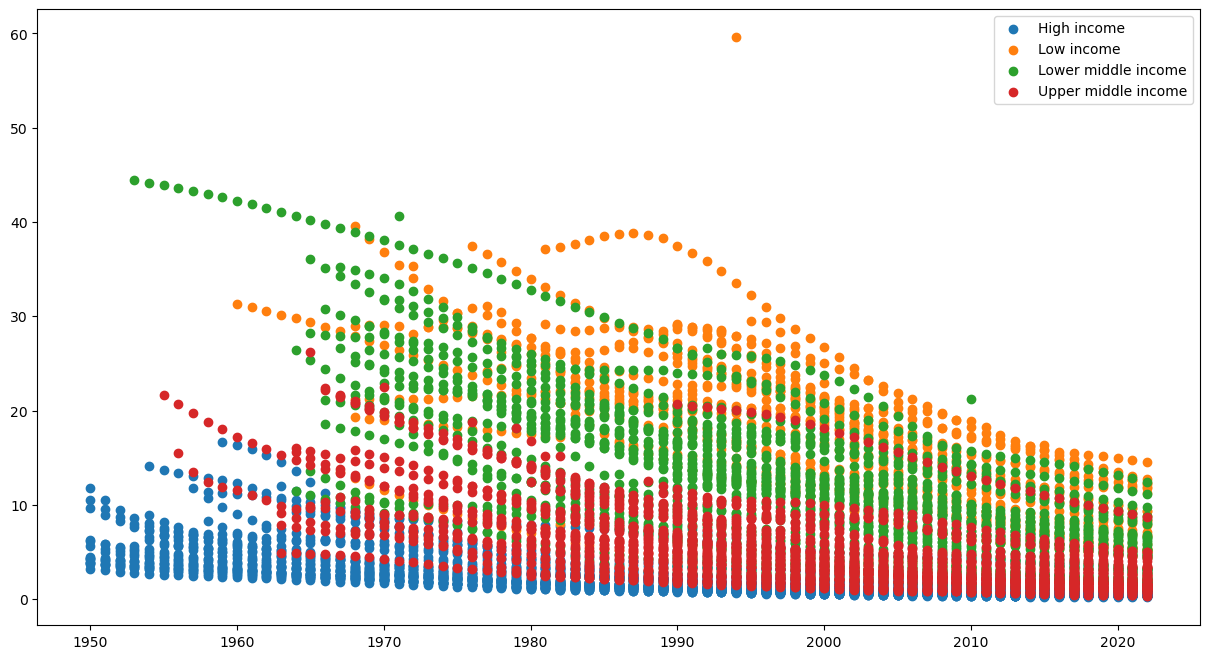

In [466]:
death_rate_income_by_income = death_rate_income.groupby("IncomeGroup")
plt.figure(figsize=(15,8))
for group, subdata in death_rate_income_by_income:
    plt.scatter(subdata["Year"], subdata["Under-fifteen mortality rate"], label=group)
plt.legend()
plt.show()

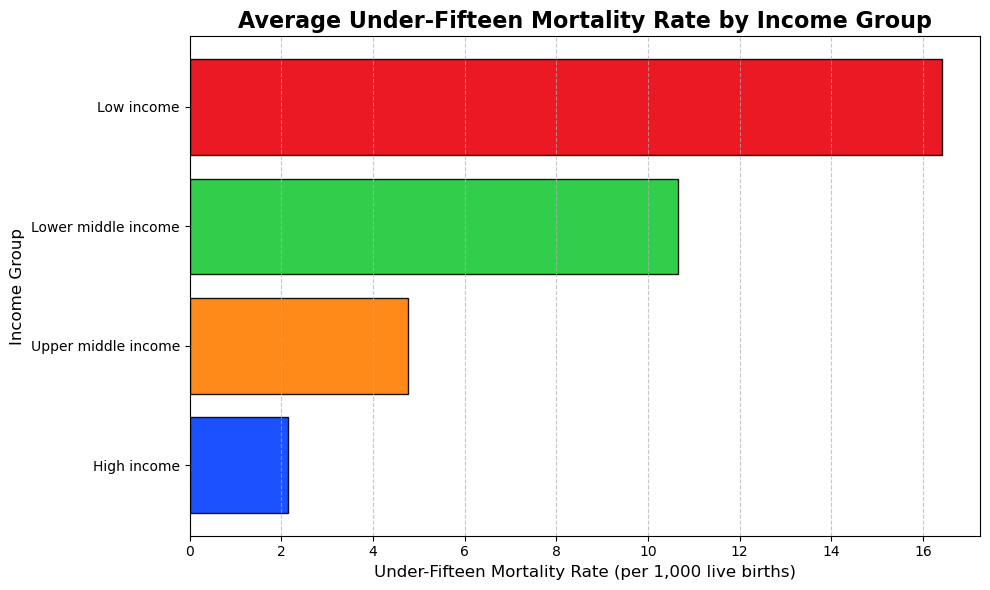

In [467]:

income_group_means = death_rate_income.groupby("IncomeGroup")["Under-fifteen mortality rate"].mean().sort_values()

palette = sns.color_palette("bright", n_colors=len(income_group_means))

plt.figure(figsize=(10, 6))
plt.barh(income_group_means.index, income_group_means.values, color=palette, edgecolor='black', alpha=0.9)

plt.title("Average Under-Fifteen Mortality Rate by Income Group", fontsize=16, fontweight='bold')
plt.xlabel("Under-Fifteen Mortality Rate (per 1,000 live births)", fontsize=12)
plt.ylabel("Income Group", fontsize=12)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


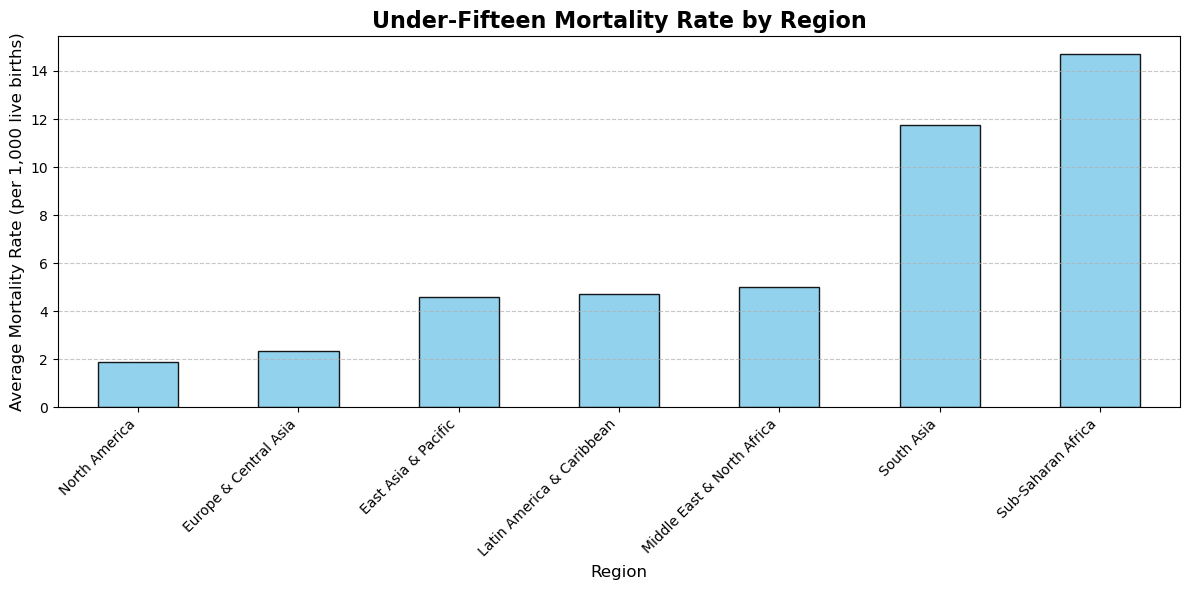

In [468]:
# Group by Region and calculate the mean mortality rate
region_mortality = death_rate_income.groupby("Region")["Under-fifteen mortality rate"].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size
region_mortality.plot(kind="bar", color='skyblue', edgecolor='black', alpha=0.9)

# Add title and labels
plt.title("Under-Fifteen Mortality Rate by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Mortality Rate (per 1,000 live births)", fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [469]:
# Group by cause of death and sum the values
leading_causes = distr_causes_death.groupby("Dim2")["FactValueNumeric"].sum().sort_values(ascending=False).reset_index()

# Display top 10 causes
print("Top 10 global causes")
print(leading_causes.head(10))

Top 10 global causes
                                                Dim2  FactValueNumeric
0                                        Prematurity         2105.8813
1                               Congenital anomalies         1845.5200
2                 Acute lower respiratory infections         1177.6671
3                    Birth asphyxia and birth trauma         1097.4895
4                     Other noncommunicable diseases          920.5492
5  Other communicable, perinatal and nutritional ...          830.7431
6                                           Injuries          680.3339
7  Sepsis and other infectious conditions of the ...          532.2128
8                                Diarrhoeal diseases          509.6652
9                                            Malaria          227.3335


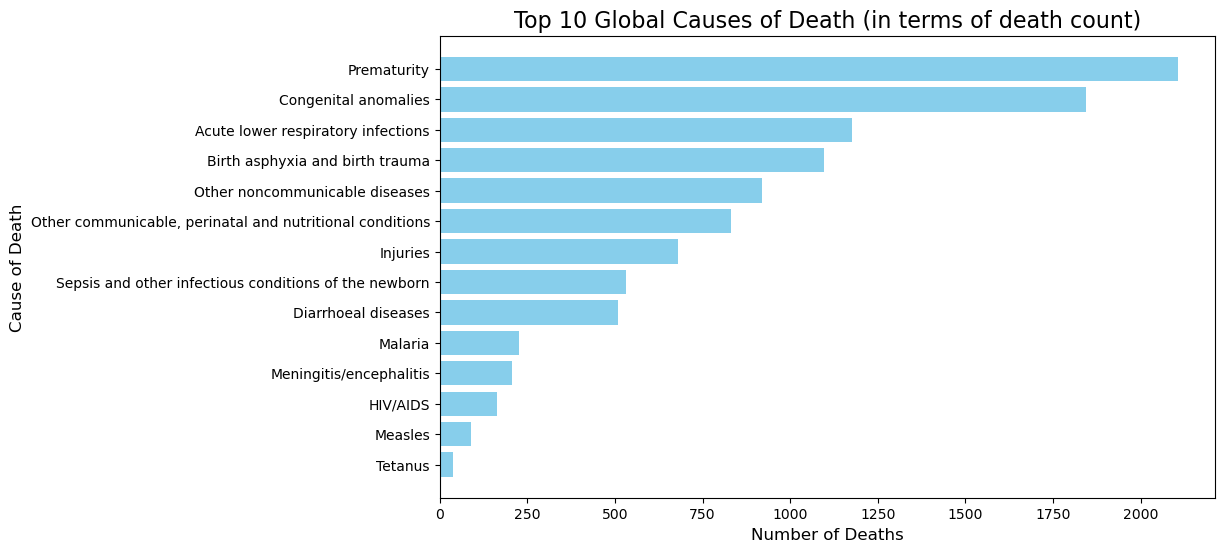

In [470]:
df = leading_causes.copy()
# df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Dim2'], df['FactValueNumeric'], color='skyblue')

# Adding titles and labels
plt.title('Top 10 Global Causes of Death (in terms of death count)', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Cause of Death', fontsize=12)

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the highest cause at the top
plt.show()

In [471]:
# Group by region and cause of death
regional_causes = distr_causes_death.groupby(["ParentLocation", "Dim2"])["FactValueNumeric"].sum().reset_index()

# Filter for a specific region
africa_data = regional_causes[regional_causes["ParentLocation"] == "Africa"]

# Sort by leading causes in Africa
africa_leading_causes = africa_data.sort_values("FactValueNumeric", ascending=False)
print("Top 10 causes in Africa")
print(africa_leading_causes[["Dim2","FactValueNumeric"]].head(10))

Top 10 causes in Africa
                                                 Dim2  FactValueNumeric
11                                        Prematurity          392.7360
0                  Acute lower respiratory infections          360.5460
1                     Birth asphyxia and birth trauma          339.8240
9   Other communicable, perinatal and nutritional ...          219.1070
6                                             Malaria          210.5373
3                                 Diarrhoeal diseases          207.3030
12  Sepsis and other infectious conditions of the ...          176.4380
2                                Congenital anomalies          168.2970
4                                            HIV/AIDS          129.7869
5                                            Injuries          111.8660


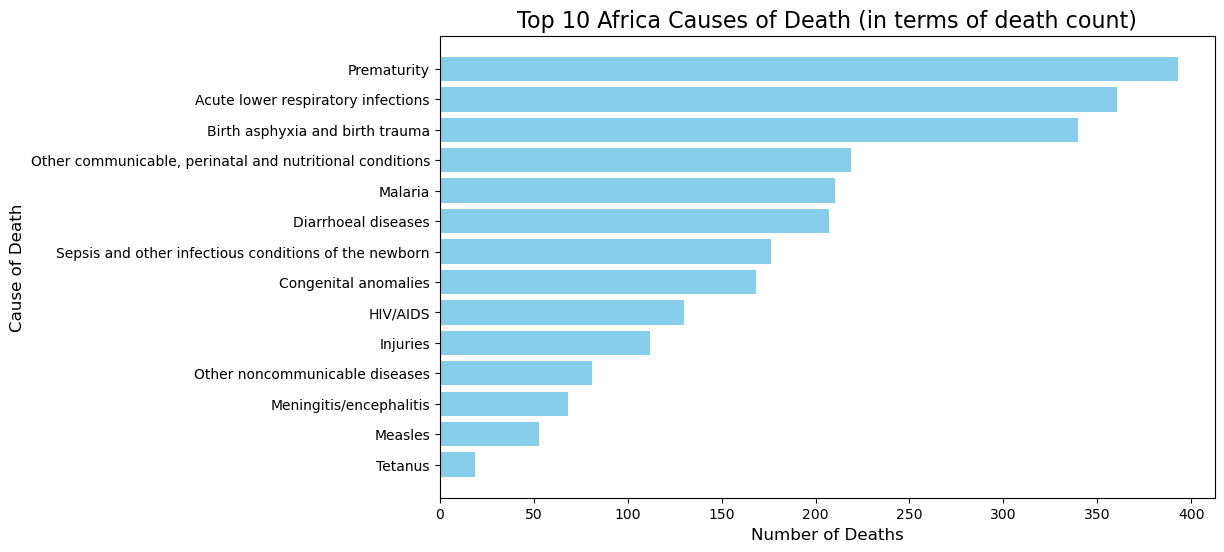

In [472]:
df = africa_leading_causes.copy()
# df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Dim2'], df['FactValueNumeric'], color='skyblue')

# Adding titles and labels
plt.title('Top 10 Africa Causes of Death (in terms of death count)', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Cause of Death', fontsize=12)

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the highest cause at the top
plt.show()

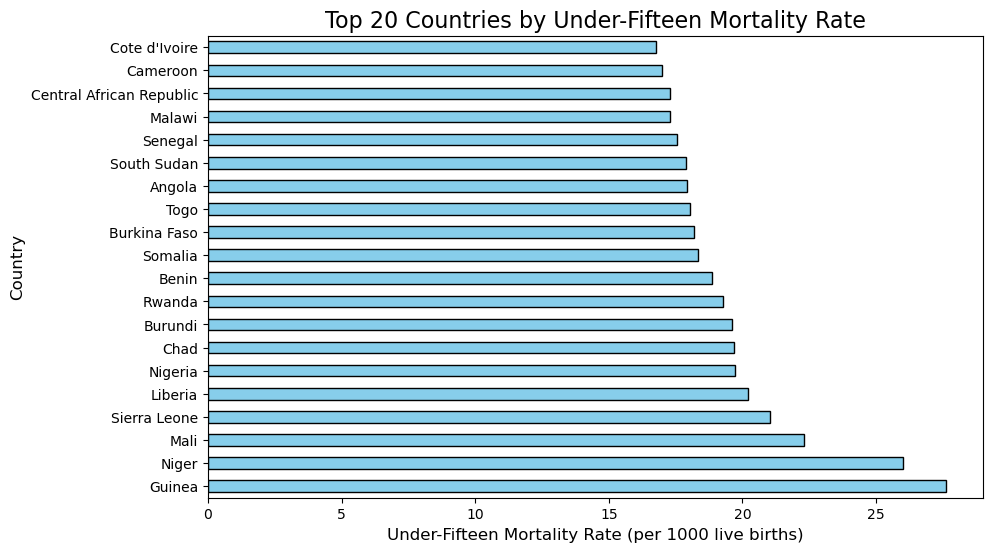

In [473]:
df = youth_mortality_rate.groupby(["Entity"])["Under-fifteen mortality rate"].mean().sort_values()[::-1].head(20)

plt.figure(figsize=(10, 6))
df.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top 20 Countries by Under-Fifteen Mortality Rate', fontsize=16)
plt.xlabel('Under-Fifteen Mortality Rate (per 1000 live births)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the plot
plt.show()

c:\Users\Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


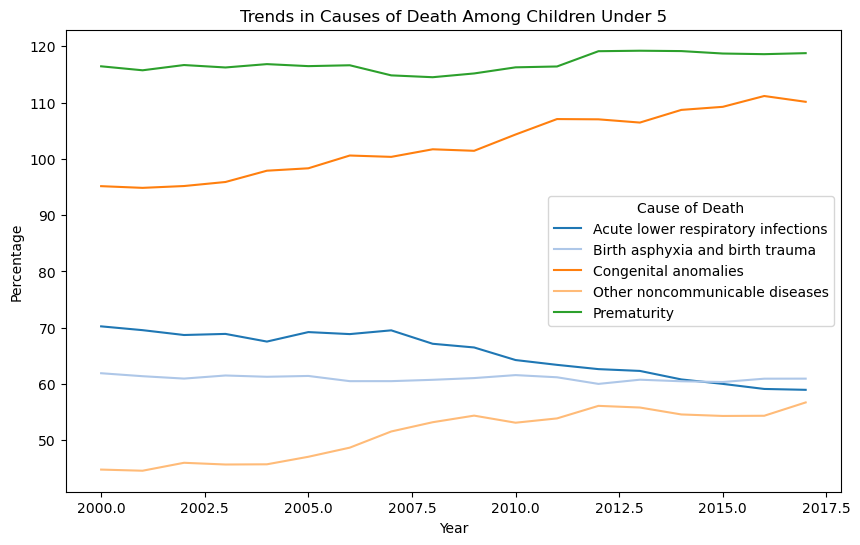

In [474]:
time_trends = distr_causes_death.groupby(["Period", "Dim2"])["FactValueNumeric"].sum().reset_index()


# Extracting the top 5 causes
top_causes = leading_causes["Dim2"].head(5)
subset = time_trends[time_trends["Dim2"].isin(top_causes)]

# Define a distinct color palette
palette = sns.color_palette("tab20", n_colors=len(top_causes))

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x="Period", y="FactValueNumeric", hue="Dim2", palette=palette)
plt.title("Trends in Causes of Death Among Children Under 5")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Cause of Death")
plt.show()

c:\Users\Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Student\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


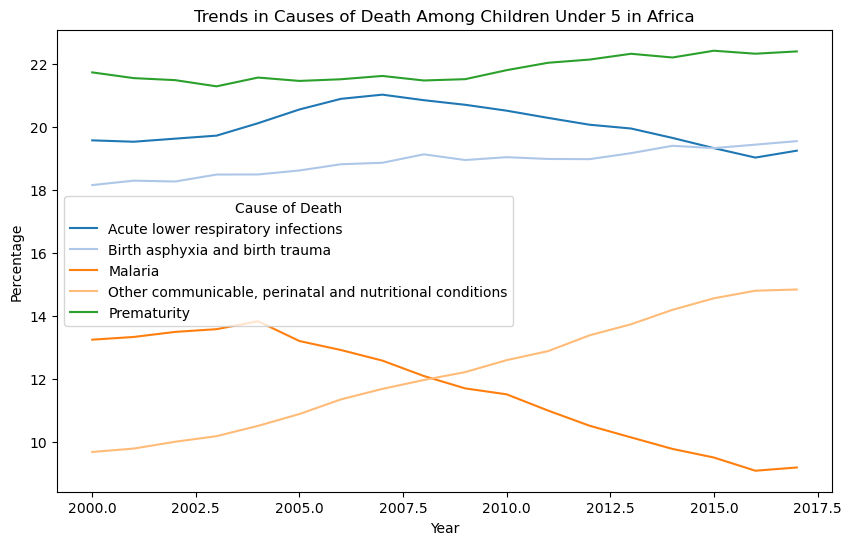

In [475]:
time_trends = distr_causes_death[distr_causes_death["ParentLocation"]=="Africa"].groupby(["Period", "Dim2"])["FactValueNumeric"].sum().reset_index()

top_causes = africa_leading_causes["Dim2"].head(5)
subset = time_trends[time_trends["Dim2"].isin(top_causes)]

# Define a distinct color palette
palette = sns.color_palette("tab20", n_colors=len(top_causes))

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x="Period", y="FactValueNumeric", hue="Dim2", palette=palette)
plt.title("Trends in Causes of Death Among Children Under 5 in Africa")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(title="Cause of Death")
plt.show()

In [476]:
vaccin_income = pd.merge(global_vaccin_covrg, metadata, on="Code")
vaccin_income

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),IncomeGroup,Region
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0,Low income,South Asia
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0,Low income,South Asia
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0,Low income,South Asia
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0,Low income,South Asia
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0,Low income,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,Zimbabwe,ZWE,2017,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0,Lower middle income,Sub-Saharan Africa
7515,Zimbabwe,ZWE,2018,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0,Lower middle income,Sub-Saharan Africa
7516,Zimbabwe,ZWE,2019,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0,Lower middle income,Sub-Saharan Africa
7517,Zimbabwe,ZWE,2020,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0,Lower middle income,Sub-Saharan Africa


In [477]:
africa_regions = ["Sub-Saharan Africa", "Middle East & North Africa"]
# metadata[["Region"]].value_counts()
vaccin_income = vaccin_income[vaccin_income["Region"].isin(africa_regions)]


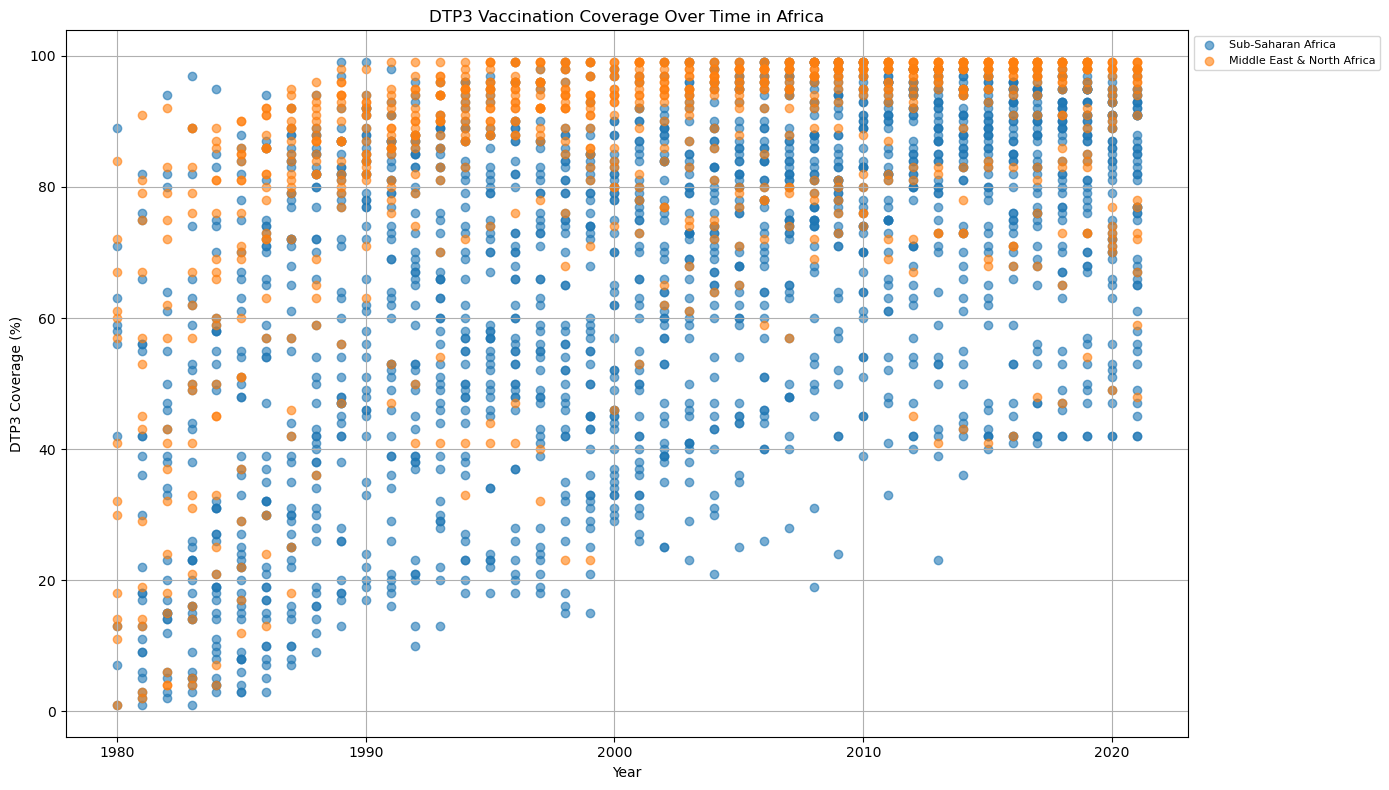

In [478]:
# Plot DTP3 vaccination coverage for African countries
plt.figure(figsize=(14, 8))
for country in africa_regions:
    country_data = vaccin_income[vaccin_income["Region"] == country]
    plt.scatter(country_data["Year"], country_data["DTP3 (% of one-year-olds immunized)"], label=country, alpha=0.6)

plt.title("DTP3 Vaccination Coverage Over Time in Africa")
plt.xlabel("Year")
plt.ylabel("DTP3 Coverage (%)")
plt.legend(loc='upper left', fontsize=8, bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

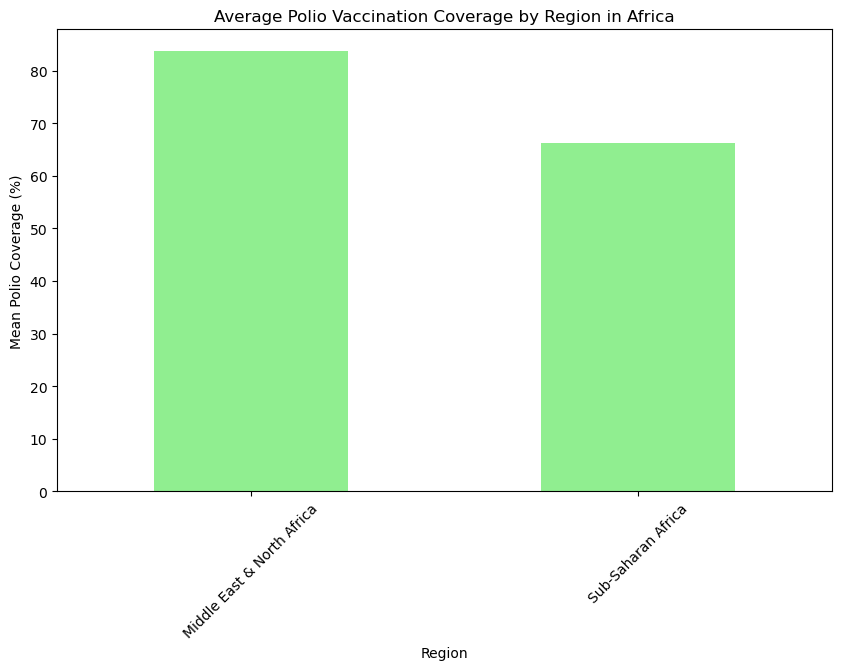

In [479]:
region_vaccination_pol3 = vaccin_income.groupby("Region")["Pol3 (% of one-year-olds immunized)"].mean()

region_vaccination_pol3_sorted = region_vaccination_pol3.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
region_vaccination_pol3_sorted.plot(kind='bar', color='lightgreen')
plt.title("Average Polio Vaccination Coverage by Region in Africa")
plt.xlabel("Region")
plt.ylabel("Mean Polio Coverage (%)")
plt.xticks(rotation=45)
plt.show()

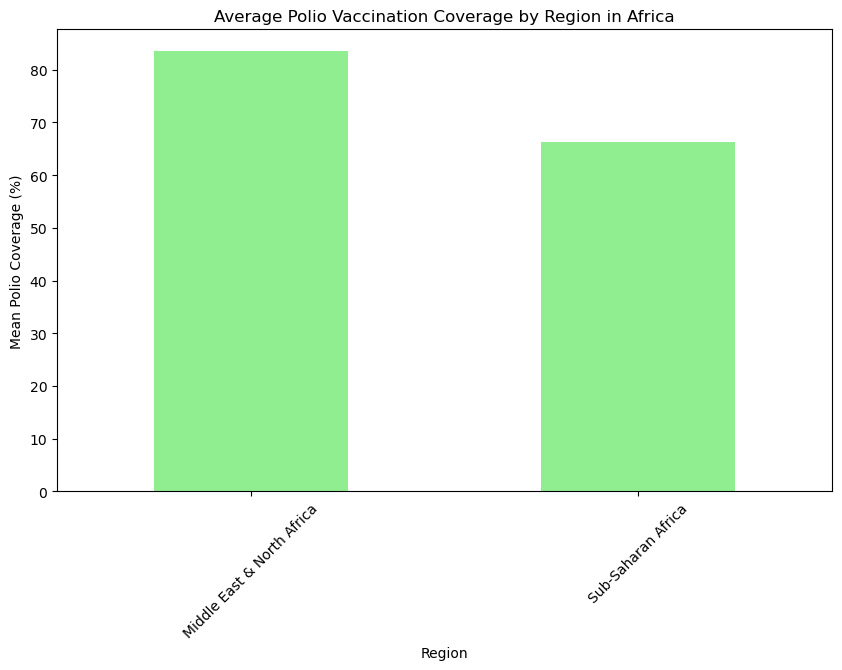

In [480]:
region_vaccination_DTP3 = vaccin_income.groupby("Region")["DTP3 (% of one-year-olds immunized)"].mean()

region_vaccination_DTP3_sorted = region_vaccination_DTP3.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
region_vaccination_DTP3_sorted.plot(kind='bar', color='lightgreen')
plt.title("Average Polio Vaccination Coverage by Region in Africa")
plt.xlabel("Region")
plt.ylabel("Mean Polio Coverage (%)")
plt.xticks(rotation=45)
plt.show()

In [481]:
cols = {
    "BCG (% of one-year-olds immunized)":"BCG",
    "HepB3 (% of one-year-olds immunized)":"HepB3",
    "Hib3 (% of one-year-olds immunized)":"Hib3",
    "IPV1 (% of one-year-olds immunized)":"IPV1",
    "MCV1 (% of one-year-olds immunized)":"MCV1",
    "PCV3 (% of one-year-olds immunized)":"PCV3",
    "Pol3 (% of one-year-olds immunized)":"Pol3",
    "RCV1 (% of one-year-olds immunized)":"RCV1",
    "RotaC (% of one-year-olds immunized)":"RotaC",
    "YFV (% of one-year-olds immunized)":"YFV",
    "DTP3 (% of one-year-olds immunized)":"DTP3"

}
vals = list(cols.values())
merged_data = pd.merge(vaccin_income, youth_mortality_rate, on=["Code", "Year"]).rename(columns=cols)
merged_data_africa = merged_data[merged_data["Region"]=="Sub-Saharan Africa"]
correlation_series = merged_data_africa[["Year", "Under-fifteen mortality rate"]+vals].corr()["Under-fifteen mortality rate"].sort_values()
correlation_series = correlation_series.drop(["Under-fifteen mortality rate"])
correlation_series

DTP3    -0.698471
Pol3    -0.692589
MCV1    -0.646507
BCG     -0.596069
Year    -0.560127
Hib3    -0.545932
HepB3   -0.514900
RCV1    -0.481618
IPV1    -0.470989
PCV3    -0.391082
YFV     -0.326755
RotaC   -0.285504
Name: Under-fifteen mortality rate, dtype: float64

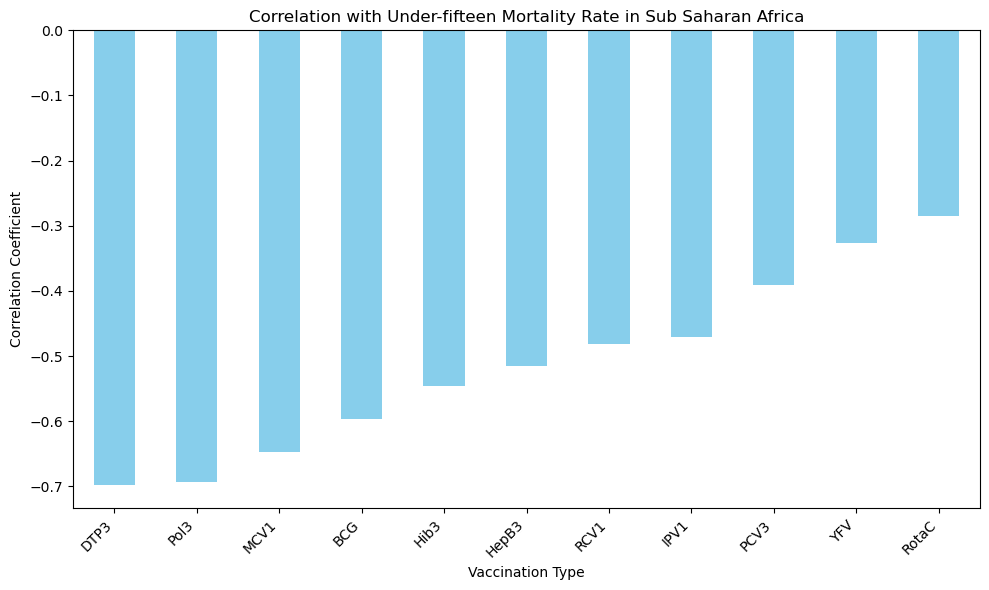

In [482]:
# Plot the correlations
correlation_series.pop("Year")
plt.figure(figsize=(10, 6))
correlation_series.plot(kind="bar", color='skyblue')

plt.title("Correlation with Under-fifteen Mortality Rate in Sub Saharan Africa")
plt.xlabel("Vaccination Type")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

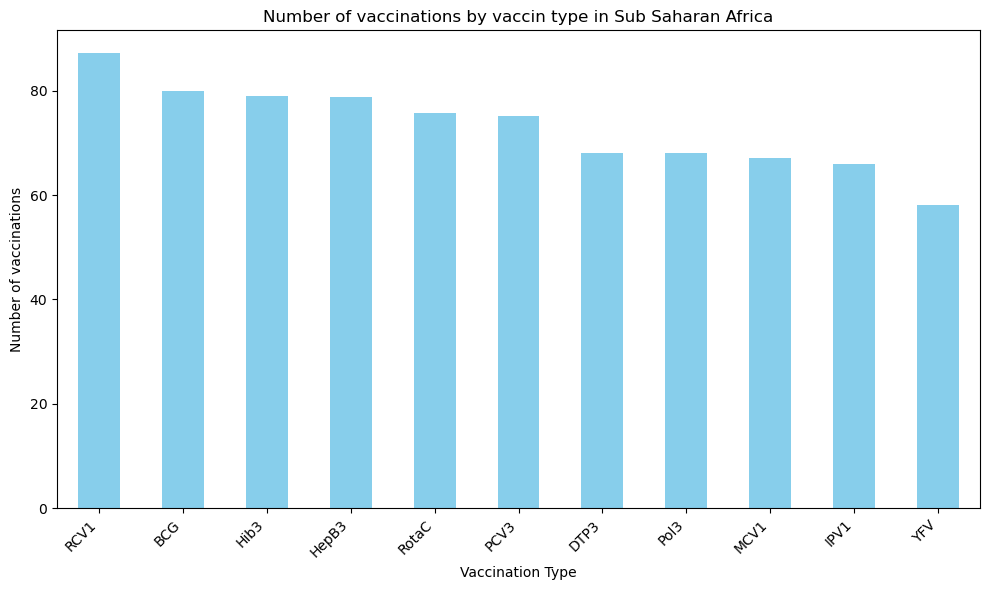

In [483]:
merged_data
ssa_africa_vaccin = merged_data[merged_data["Region"]=="Sub-Saharan Africa"]
ssa_africa_vaccin_filtered = ssa_africa_vaccin[list(cols.values())]
# ssa_africa_vaccin_filtered.mean(axis=0).plot(kind='bar')

plt.figure(figsize=(10, 6))
ssa_africa_vaccin_filtered.mean(axis=0).sort_values()[::-1].plot(kind="bar", color='skyblue')

plt.title("Number of vaccinations by vaccin type in Sub Saharan Africa")
plt.xlabel("Vaccination Type")
plt.ylabel("Number of vaccinations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# health protection coverage

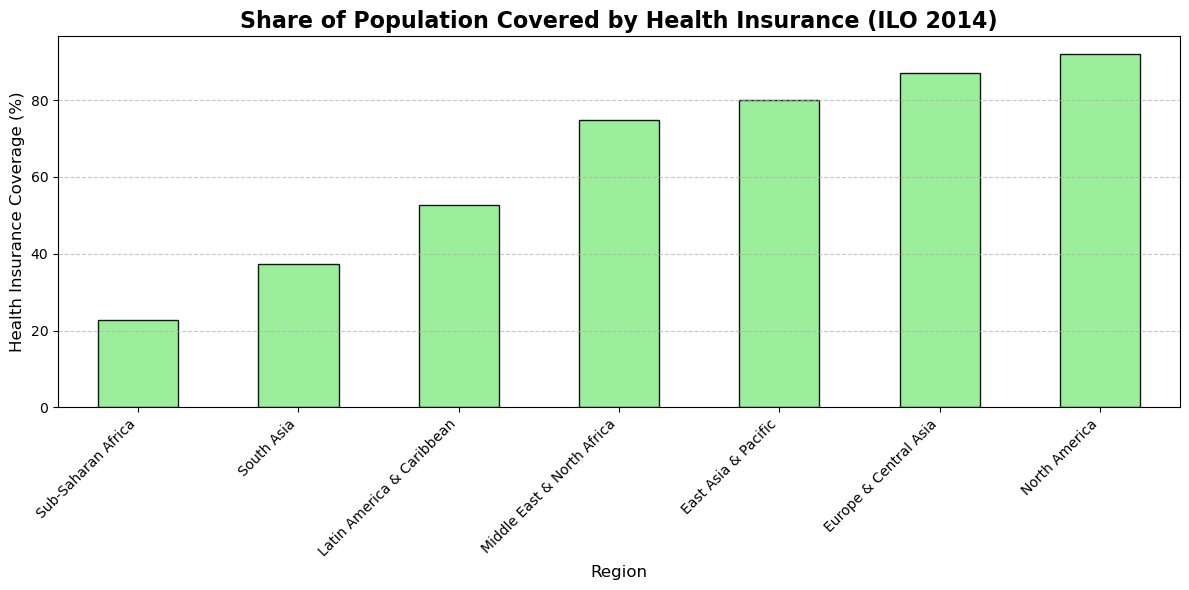

In [484]:
merge_prtc_income = pd.merge(health_protect_covg, metadata, on="Code").rename(columns={"Share of population covered by health insurance (ILO (2014))":"covered_2014"})

region_coverage = merge_prtc_income.groupby("Region")["covered_2014"].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Larger figure size for clarity
region_coverage.plot(kind="bar", color='lightgreen', edgecolor='black', alpha=0.9)

# Adding title and axis labels
plt.title("Share of Population Covered by Health Insurance (ILO 2014)", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Health Insurance Coverage (%)", fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

## Sub saharan africa has the lowest health covering

In [485]:
merge_prtc_income_ssa = merge_prtc_income[merge_prtc_income["Region"] == "Sub-Saharan Africa"]
# merge_prtc_income_ssa = merge_prtc_income_ssa[merge_prtc_income_ssa["Year"] >= 2010]
merge_prtc_income_ssa_mortality = pd.merge(merge_prtc_income_ssa, youth_mortality_rate, on="Code")
merge_prtc_income_ssa_mortality[["covered_2014", "Under-fifteen mortality rate"]].corr()

,covered_2014,Under-fifteen mortality rate
covered_2014,1.000000,-0.334345
Under-fifteen mortality rate,-0.334345,1.000000


In [486]:
merge_prtc_income_ssa_sorted = merge_prtc_income_ssa[["Entity","covered_2014"]].sort_values(by="covered_2014")
merge_prtc_income_ssa_sorted = merge_prtc_income_ssa_sorted[:10]

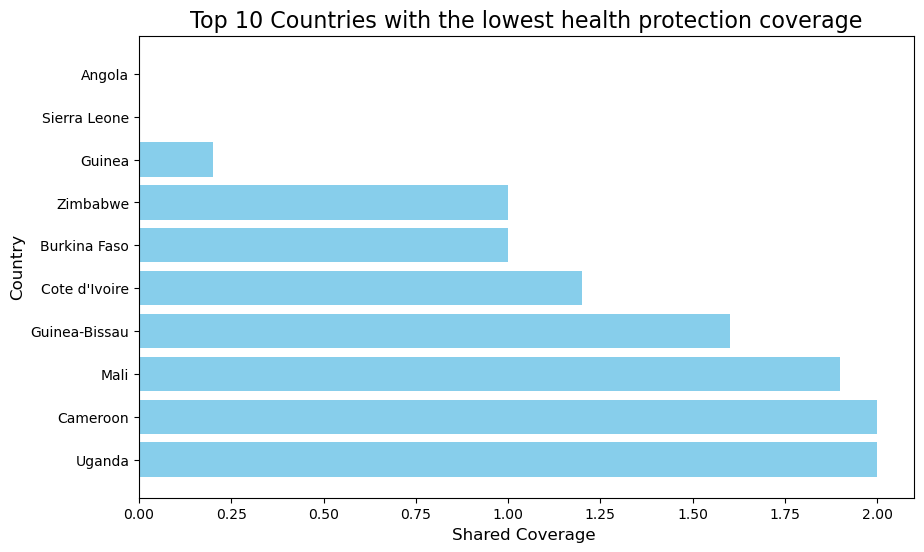

In [487]:
plt.figure(figsize=(10, 6))
plt.barh(merge_prtc_income_ssa_sorted['Entity'], merge_prtc_income_ssa_sorted['covered_2014'], color='skyblue')

# Adding titles and labels
plt.title('Top 10 Countries with the lowest health protection coverage', fontsize=16)
plt.xlabel('Shared Coverage ', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis to have the highest cause at the top
plt.show()

## birth by health staff

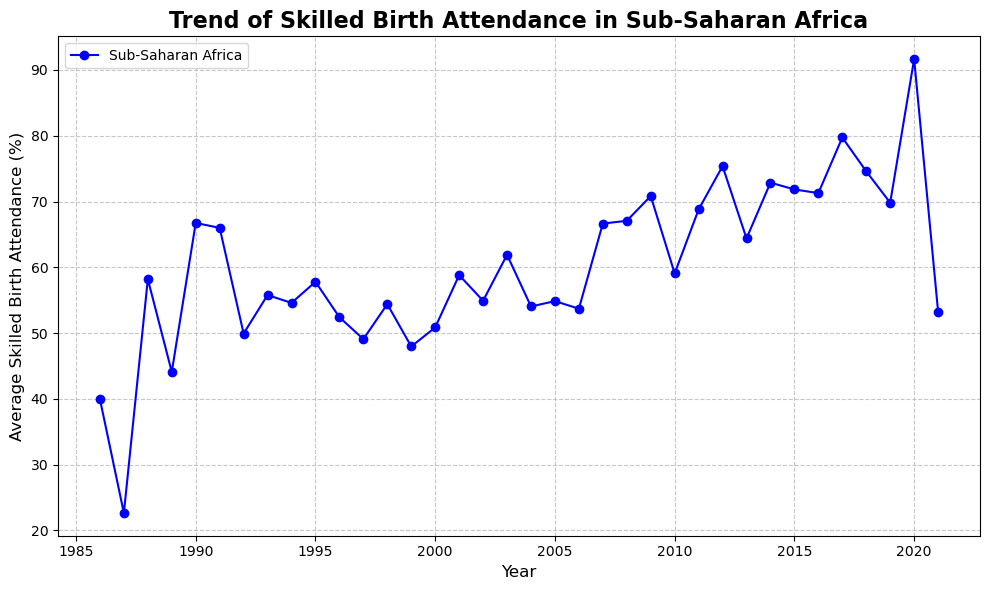

In [488]:
# Filter for Sub-Saharan Africa
merged_income_staff_ssa = merged_income_staff[merged_income_staff["Region"] == "Sub-Saharan Africa"]

# Group by Year and calculate the mean
merged_income_staff_ssa_year = merged_income_staff_ssa.groupby("Year")["Births attended by skilled health staff (% of total)"].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(merged_income_staff_ssa_year.index, merged_income_staff_ssa_year, marker='o', linestyle='-', color='blue', label='Sub-Saharan Africa')

# Add labels, title, and legend
plt.title("Trend of Skilled Birth Attendance in Sub-Saharan Africa", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Skilled Birth Attendance (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [489]:
merged_staff_mort_rate = pd.merge(birth_attended_health_staff, youth_mortality_rate, on="Code")
merged_staff_mort_rate[["Births attended by skilled health staff (% of total)", "Under-fifteen mortality rate"]].corr()

,Births attended by skilled health staff (% of total),Under-fifteen mortality rate
Births attended by skilled health staff (% of total),1.000000,-0.536168
Under-fifteen mortality rate,-0.536168,1.000000


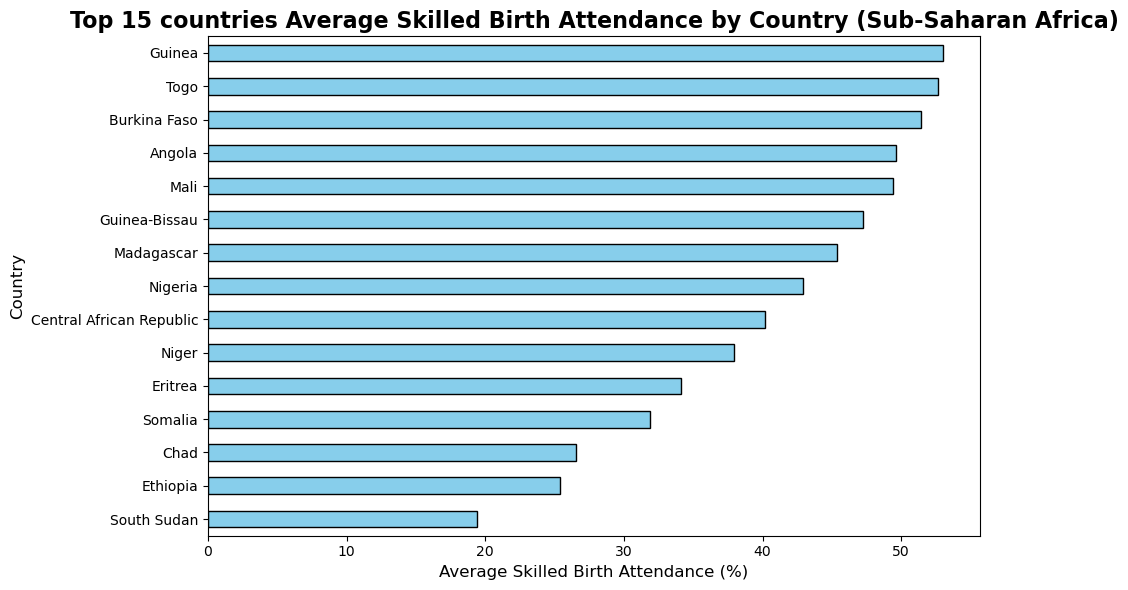

In [490]:
country_mean_staff = merged_income_staff_ssa[merged_income_staff_ssa["Year"]>=2010].groupby("Entity")["Births attended by skilled health staff (% of total)"].mean().sort_values()[:15]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust size for better readability
country_mean_staff.plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Top 15 countries Average Skilled Birth Attendance by Country (Sub-Saharan Africa)", fontsize=16, fontweight='bold')
plt.xlabel("Average Skilled Birth Attendance (%)", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [491]:
cols = {
    "BCG (% of one-year-olds immunized)":"BCG",
    "HepB3 (% of one-year-olds immunized)":"HepB3",
    "Hib3 (% of one-year-olds immunized)":"Hib3",
    "IPV1 (% of one-year-olds immunized)":"IPV1",
    "MCV1 (% of one-year-olds immunized)":"MCV1",
    "PCV3 (% of one-year-olds immunized)":"PCV3",
    "Pol3 (% of one-year-olds immunized)":"Pol3",
    "RCV1 (% of one-year-olds immunized)":"RCV1",
    "RotaC (% of one-year-olds immunized)":"RotaC",
    "YFV (% of one-year-olds immunized)":"YFV",
    "DTP3 (% of one-year-olds immunized)":"DTP3"

}

def fill_nan_with_global_mean(df, columns_to_fill):
    
    for col in columns_to_fill:
        # Calculate the global mean for each column and fill NaNs
        global_mean = df[col].mean()
        df[col].fillna(global_mean, inplace=True)
    
    return df

columns_to_fill = ["DTP3", "Pol3", "MCV1", "BCG", "Hib3", "HepB3", "RCV1", "IPV1", "PCV3", "YFV", "RotaC"]



more_correlated_vaccins = ["DTP3", "Pol3", "MCV1", "BCG", "Hib3", "HepB3", "RCV1", "IPV1", "PCV3", "YFV", "RotaC"]
merge_mort_vacc = pd.merge(youth_mortality_rate, global_vaccin_covrg, on=["Code","Entity","Year"]).rename(columns=cols)
merge_mort_vacc = merge_mort_vacc[["Entity", "Code", "Year", "Under-fifteen mortality rate"]+more_correlated_vaccins]
merge_mort_vacc_income = pd.merge(merge_mort_vacc, metadata, on="Code")
merge_mort_vacc_income = merge_mort_vacc_income[merge_mort_vacc_income["Region"]=="Sub-Saharan Africa"]
merge_mort_vacc_income_filled = fill_nan_with_global_mean(merge_mort_vacc_income, columns_to_fill)
final_merge = pd.merge(merge_mort_vacc_income_filled, health_protect_covg, on=["Code", "Entity", "Year"], how="left").rename(columns={"Under-fifteen mortality rate":"mort-rate","Share of population covered by health insurance (ILO (2014))":"health-cover"})
mean_health_cover = final_merge["health-cover"].mean()
final_merge["health-cover"].fillna(mean_health_cover, inplace=True)
final_merge



,Entity,Code,Year,mort-rate,DTP3,Pol3,MCV1,BCG,Hib3,HepB3,RCV1,IPV1,PCV3,YFV,RotaC,IncomeGroup,Region,health-cover
0,Angola,AGO,1990,26.674010,24.0,23.0,38.0,48.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa,22.652941
1,Angola,AGO,1991,26.022940,26.0,26.0,39.0,53.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa,22.652941
2,Angola,AGO,1992,26.621315,21.0,21.0,39.0,47.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa,22.652941
3,Angola,AGO,1993,25.952713,30.0,28.0,47.0,53.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa,22.652941
4,Angola,AGO,1994,25.869259,27.0,28.0,44.0,48.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa,22.652941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,Zimbabwe,ZWE,2017,6.782280,89.0,89.0,90.0,95.0,89.000000,89.000000,90.000000,66.021505,89.000000,58.163223,91.000000,Lower middle income,Sub-Saharan Africa,22.652941
1739,Zimbabwe,ZWE,2018,6.515447,89.0,89.0,88.0,95.0,89.000000,89.000000,88.000000,66.021505,89.000000,58.163223,90.000000,Lower middle income,Sub-Saharan Africa,22.652941
1740,Zimbabwe,ZWE,2019,6.387253,90.0,90.0,85.0,95.0,90.000000,90.000000,85.000000,65.000000,90.000000,58.163223,92.000000,Lower middle income,Sub-Saharan Africa,22.652941
1741,Zimbabwe,ZWE,2020,6.259883,86.0,86.0,85.0,88.0,86.000000,86.000000,85.000000,86.000000,86.000000,58.163223,88.000000,Lower middle income,Sub-Saharan Africa,22.652941


In [492]:
merge_mort_vacc_income_filled

,Entity,Code,Year,Under-fifteen mortality rate,DTP3,Pol3,MCV1,BCG,Hib3,HepB3,RCV1,IPV1,PCV3,YFV,RotaC,IncomeGroup,Region
140,Angola,AGO,1990,26.674010,24.0,23.0,38.0,48.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa
141,Angola,AGO,1991,26.022940,26.0,26.0,39.0,53.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa
142,Angola,AGO,1992,26.621315,21.0,21.0,39.0,47.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa
143,Angola,AGO,1993,25.952713,30.0,28.0,47.0,53.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa
144,Angola,AGO,1994,25.869259,27.0,28.0,44.0,48.0,79.064841,78.748268,87.213953,66.021505,75.161644,58.163223,75.696864,Lower middle income,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,Zimbabwe,ZWE,2017,6.782280,89.0,89.0,90.0,95.0,89.000000,89.000000,90.000000,66.021505,89.000000,58.163223,91.000000,Lower middle income,Sub-Saharan Africa
7065,Zimbabwe,ZWE,2018,6.515447,89.0,89.0,88.0,95.0,89.000000,89.000000,88.000000,66.021505,89.000000,58.163223,90.000000,Lower middle income,Sub-Saharan Africa
7066,Zimbabwe,ZWE,2019,6.387253,90.0,90.0,85.0,95.0,90.000000,90.000000,85.000000,65.000000,90.000000,58.163223,92.000000,Lower middle income,Sub-Saharan Africa
7067,Zimbabwe,ZWE,2020,6.259883,86.0,86.0,85.0,88.0,86.000000,86.000000,85.000000,86.000000,86.000000,58.163223,88.000000,Lower middle income,Sub-Saharan Africa


In [495]:
def evaluate_models(X, y):
    
    # Define the models to evaluate
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    best_model = None
    best_model_name = None
    best_r2_score = -float("inf")
    best_mse = float("inf")
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")
        
        if r2 > best_r2_score:
            best_r2_score = r2
            best_model = model
            best_model_name = model_name
            best_mse = mse
    
    return best_model, best_model_name, best_r2_score, best_mse

X = final_merge[["Year", "DTP3", "Pol3", "MCV1", "BCG", "Hib3", "HepB3", "RCV1", "IPV1", "PCV3", "health-cover", "YFV", "RotaC"]]  # Features
y = final_merge["mort-rate"]  # Target

# Evaluate models and choose the best
best_model, best_model_name, best_r2_score, best_mse = evaluate_models(X, y)

print(f"\nBest Model: {best_model_name}")
print(f"R² Score: {best_r2_score:.2f}")
print(f"Mean Squared Error: {best_mse:.2f}")


Linear Regression - MSE: 23.19, R²: 0.53
Random Forest - MSE: 14.99, R²: 0.69
XGBoost - MSE: 15.24, R²: 0.69

Best Model: Random Forest
R² Score: 0.69
Mean Squared Error: 14.99


Mean Squared Error: 14.99
R² Score: 0.69


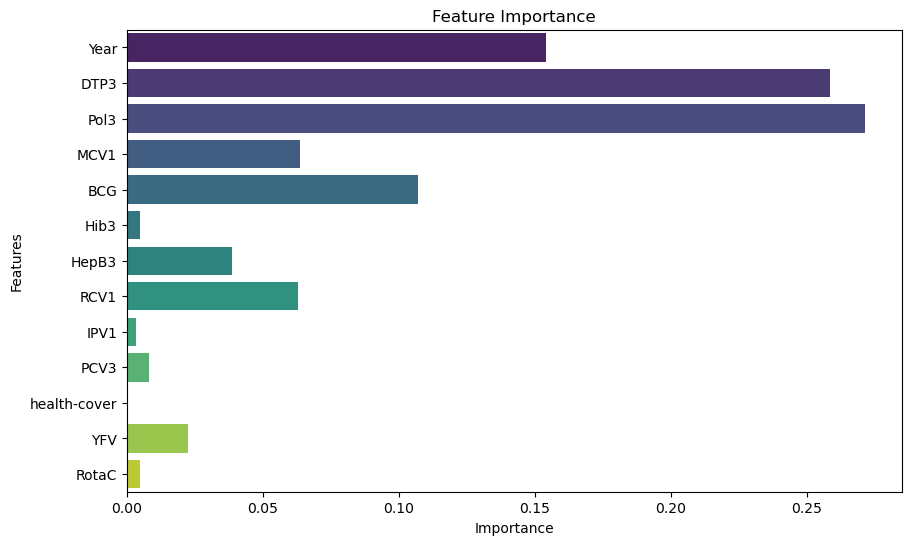

In [496]:
features = ["Year", "DTP3", "Pol3", "MCV1", "BCG", "Hib3", "HepB3", "RCV1", "IPV1", "PCV3", "health-cover", "YFV", "RotaC"]
# features = ["Year", "DTP3", "Pol3", "MCV1", "BCG", "Hib3", "HepB3", "RCV1", "IPV1", "PCV3", "health-cover", "YFV", "RotaC"]

target = "mort-rate" 

X = final_merge[features]
y = final_merge[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

importances = model.feature_importances_
features = X.columns

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
